In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import os
import numpy as np

In [10]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

In [11]:
data_dir = 'Test'

img_height = 255
img_width = 255
batch_size = 120

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 4 classes.


In [4]:
sampleBatch = []

for images, labels in test_ds.take(1):
    sampleBatch.append(labels)

print(sampleBatch)

[<tf.Tensor: shape=(120,), dtype=int32, numpy=
array([1, 1, 0, 2, 3, 1, 2, 2, 1, 1, 3, 3, 3, 2, 0, 2, 2, 3, 3, 0, 0, 2,
       3, 0, 0, 3, 0, 2, 1, 3, 2, 2, 0, 0, 3, 2, 2, 1, 3, 3, 2, 3, 1, 1,
       3, 1, 0, 2, 1, 0, 2, 3, 2, 3, 3, 2, 1, 2, 3, 1, 1, 0, 1, 2, 2, 2,
       0, 3, 3, 3, 0, 3, 2, 3, 2, 0, 1, 0, 2, 1, 0, 2, 0, 3, 2, 2, 1, 2,
       2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 3, 0, 0, 2, 3, 1, 0, 2, 3, 0,
       2, 0, 1, 1, 2, 3, 0, 0, 2, 1])>]


In [5]:
sampleBatch[0]
sampleBatch[0].numpy().tolist()
samplebatchnp = sampleBatch[0].numpy()
samplebatchlist = samplebatchnp.tolist()

In [6]:
print(samplebatchlist)
print(samplebatchlist.count(0))
print(samplebatchlist.count(1))
print(samplebatchlist.count(2))
print(samplebatchlist.count(3))

[1, 1, 0, 2, 3, 1, 2, 2, 1, 1, 3, 3, 3, 2, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 0, 3, 0, 2, 1, 3, 2, 2, 0, 0, 3, 2, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 0, 2, 1, 0, 2, 3, 2, 3, 3, 2, 1, 2, 3, 1, 1, 0, 1, 2, 2, 2, 0, 3, 3, 3, 0, 3, 2, 3, 2, 0, 1, 0, 2, 1, 0, 2, 0, 3, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 3, 0, 0, 2, 3, 1, 0, 2, 3, 0, 2, 0, 1, 1, 2, 3, 0, 0, 2, 1]
30
24
38
28


In [7]:
aqlset_list =(random.choices(samplebatchlist,k = 80))
print(aqlset_list)

[1, 2, 1, 2, 0, 1, 2, 0, 1, 3, 2, 0, 2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 2, 1, 3, 0, 2, 3, 2, 0, 1, 2, 3, 3, 3, 2, 0, 2, 2, 0, 2, 2, 3, 0, 0, 3, 1, 3, 1, 0, 1, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 1, 2, 1, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2, 0, 0, 3, 3, 3, 2]


In [8]:
blotchApple = aqlset_list.count(0)
HealtyApple = aqlset_list.count(1)
rotApple = aqlset_list.count(2)
scabApple = aqlset_list.count(3)

def AQLTestscore():

    for apple in aqlset_list:
        
        if HealtyApple >=79:
            print (f'The batch has been quallified as: Class 1\n')
        elif HealtyApple >=75:
            print (f'The batch has been quallified as: Class 2\n')
        elif HealtyApple >=73:
            print (f'The batch has been quallified as: Class 3\n')
        else:
            print (f'The batch has been rejected\n')

        print (f'The total batch of {len(aqlset_list)} apples consists of:\n'
        f'Healthy apples: {HealtyApple}\n'
        f'Blotch apples: {blotchApple}\n'
        f'Rot apples: {rotApple}\n'
        f'Scab apples: {scabApple}\n')
        break
    
AQLTestscore()



The batch has been rejected

The total batch of 80 apples consists of:
Healthy apples: 15
Blotch apples: 19
Rot apples: 25
Scab apples: 21



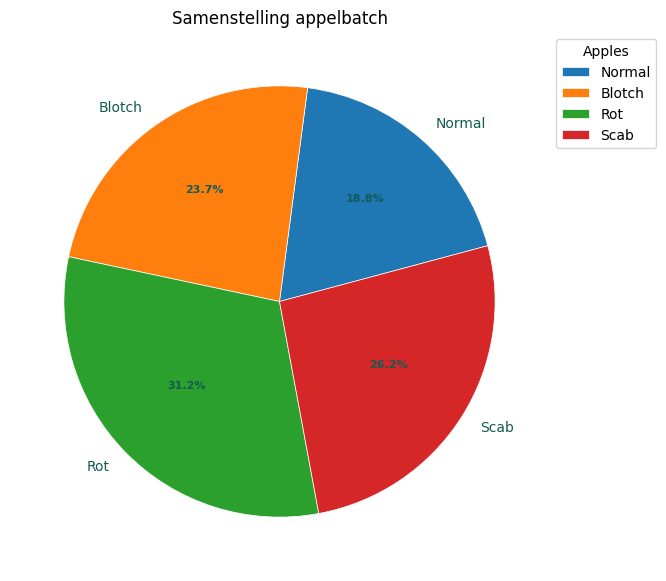

In [9]:
# Creating dataset
appleLabels = ['Normal', 'Blotch', 'Rot', 'Scab']
 
data = [HealtyApple, blotchApple, rotApple, scabApple]

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0) # not necessary

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "white" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = appleLabels,
								shadow = False,
								startangle = 15,
								wedgeprops = wp,
								textprops = dict(color ="#115C53"))

# Adding legend
ax.legend(wedges, appleLabels,
		title ="Apples",
		loc ="upper left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Samenstelling appelbatch") # add Classification as title

#show plot
plt.show() 